# Introduction

This will be the first of many files that will act as primers or as reference material for the data science stack of Python with a special focus on Finance applications.

To that end, this file will include general Python code that will act as a reference. The Python code here is from Dr. Yves Hilpish's book, <a href='https://www.amazon.co.uk/Python-Finance-Mastering-Data-Driven/dp/1492024333'>Python for Finance 2e: Mastering Data-Driven Finance</a> with some minor adjustments. I highly recommend this book to anyone interested in Python and how it is used in Finance. I also recommend all other books written by Dr. Yves Hilpish.

# Integers

In [1]:
# Getting the type of a value
a = 6
type(a)

int

In [2]:
# Getting the number of bits of a value
a.bit_length()

3

In [3]:
a = 333333333
a.bit_length()

29

# Floats

In [4]:
# Floating point numbers in Python
b = 0.35
type(b)

float

In [5]:
b + 0.1

0.44999999999999996

In [6]:
# Different Representations of floating point numbers
c = 0.5
c.as_integer_ratio()

(1, 2)

In [7]:
b.as_integer_ratio()

(3152519739159347, 9007199254740992)

Different representations of numbers can cause problems especially when dealing with large sets of data. A certain kind of representation error can lead to considerable deviations from a benchmark value.

In [8]:
# The module decimal provides an arbitrary-precision object
# to address precision issues
import decimal
from decimal import Decimal

decimal.getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [9]:
d = Decimal(1) / Decimal(11)
d

Decimal('0.09090909090909090909090909091')

In [10]:
# Changing the precision of the representation
decimal.getcontext().prec = 4 # Lower precision than normal
e = Decimal(1) / Decimal(11)
e

Decimal('0.09091')

In [11]:
decimal.getcontext().prec = 50 # Higher precision than normal
f = Decimal(1) / Decimal(11)
f

Decimal('0.090909090909090909090909090909090909090909090909091')

In [12]:
# Precision is automatically adjusted to be able to handle data
# that have different magnitudes
g = d + e + f
g

Decimal('0.27272818181818181818181818181909090909090909090909')

# Booleans

In [13]:
# Python keywords
import keyword

keyword.kwlist

['False',
 'None',
 'True',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

In [14]:
4 > 3 # Same with 4 >= 3

True

In [15]:
type(4 > 3)

bool

In [16]:
4 < 3

False

In [17]:
4 == 3

False

## Logical Operators

In [18]:
True and True

True

In [19]:
True and False

False

In [20]:
False and False

False

In [21]:
True or True

True

In [22]:
True or False

True

In [23]:
False or False

False

In [24]:
not True

False

In [25]:
not False

True

In [26]:
(4 > 3) and (2 > 3)

False

In [27]:
(4 == 3) or (2 != 3)

True

In [28]:
not (4 != 4)

True

## Conditionals and Loops

In [29]:
if 4 > 3:
    print('condition true')

condition true


In [30]:
i = 0
while i < 4:
    print('condition true, i =', i)
    i += 1

condition true, i = 0
condition true, i = 1
condition true, i = 2
condition true, i = 3


## Casting

In [31]:
int(True)

1

In [32]:
int(False)

0

In [33]:
float(True)

1.0

In [34]:
float(False)

0.0

In [35]:
bool(0)

False

In [36]:
bool(1)

True

# Strings

Strings are special types of object that support texts. They are immutable, meaning they can't be changed easily once they've been defined.

In [37]:
t = 'my name is jeff'

t.split()

['my', 'name', 'is', 'jeff']

In [38]:
t.find('jeff')

11

In [39]:
t.replace(' ', '|')

'my|name|is|jeff'

In [40]:
'http://www.python.org'.strip('htp:/')

'www.python.org'

## String Replacement

In [41]:
# Old way
'this is an integer: %d' % 15

'this is an integer: 15'

In [42]:
'this is a float: %.2f' % 3.8579

'this is a float: 3.86'

In [43]:
'this is a string: %s' % 'jeff'

'this is a string: jeff'

In [44]:
# Newer ways
print('this is an integer: {:d}'.format(15)) # According to the book
print(f'this is an integer: {15}') # Even better

this is an integer: 15
this is an integer: 15


In [45]:
print('this is a float: {:.4f}'.format(3.8579))
print(f'this is a float: {3.8579}')

this is a float: 3.8579
this is a float: 3.8579


In [46]:
print('this is a string: {:s}'.format('jeff'))
print(f'this is a string: {"jeff"}')

this is a string: jeff
this is a string: jeff


## Regular Expressions

In [47]:
import re

series = """
 '01/18/2014 13:00:00', 100, '1st';
 '01/18/2014 13:30:00', 110, '2nd';
 '01/18/2014 14:00:00', 120, '3rd'
 """
dt = re.compile("'[0-9/:\s]+'")

result = dt.findall(series)
result

["'01/18/2014 13:00:00'", "'01/18/2014 13:30:00'", "'01/18/2014 14:00:00'"]

In [48]:
from datetime import datetime

pydt = datetime.strptime(result[0].replace("'", ""),
                         '%m/%d/%Y %H:%M:%S')
pydt

datetime.datetime(2014, 1, 18, 13, 0)

In [49]:
print(pydt)

2014-01-18 13:00:00


# Basic Data Structures

## Tuples

An immutable collection of arbitrary objects; only a few methods available.

In [50]:
t = (1, 2.5, 'data')
type(t)

tuple

In [51]:
# You can drop the parentheses
t = 1, 2.5, 'data'
type(t)

tuple

In [52]:
print(t[2])
print(type(t[2]))

data
<class 'str'>


In [53]:
# count(object) => counts the number of occurences of a certain object
t.count('data')

1

In [54]:
# index(object) => gives the index value of the first appearance of the object.
t.index(2.5)

1

## Lists

A mutable collection of arbitrary objects; many methods available.

In [55]:
l = [1, 2.5, 'data']
l[1]

2.5

In [56]:
# Lists can be defined using the function list()
l = list(t)
l

[1, 2.5, 'data']

In [57]:
type(l)

list

In [58]:
# append(object) => appends a new object at the end of a list
l.append([4, 3])
l

[1, 2.5, 'data', [4, 3]]

In [59]:
# extend(object) => same as append but it appends each object of a list to another list
l.extend([1.0, 1.5, 2.0])
l

[1, 2.5, 'data', [4, 3], 1.0, 1.5, 2.0]

In [60]:
# insert(i, object) => inserts a new object into the list at a specific index i
l.insert(1, 'insert')
l

[1, 'insert', 2.5, 'data', [4, 3], 1.0, 1.5, 2.0]

In [61]:
# remove(object) => removes the first occurence of an object
l.remove('data')
l

[1, 'insert', 2.5, [4, 3], 1.0, 1.5, 2.0]

In [62]:
# pop(i) => removes and returns object at index i
p = l.pop(3)
print(l, p)

[1, 'insert', 2.5, 1.0, 1.5, 2.0] [4, 3]


In [63]:
# Slicing allows us to break down a data set into smaller parts
l[2:5] # takes elements from index 2 to index 4 (index 5 is non-inclusive)

[2.5, 1.0, 1.5]

The table below from the book outlines some of the list functions of Python.

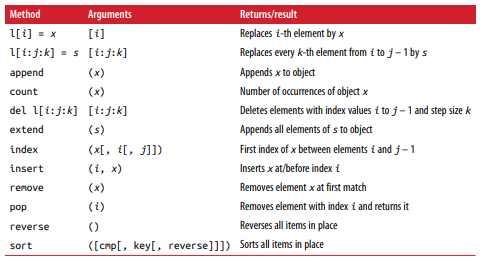

In [64]:
from IPython import display
display.Image('res/list_functions.png')

### List Comprehensions

In [65]:
# The book covers loops and conditionals
# We've already done that
# We'll discuss the new thing
# List comprehensions
m = [i ** 2 for i in range(5)]
m

[0, 1, 4, 9, 16]

### Functional Programming

This is an entire topic in and of itself. We'll touch briefly on how Python supports this paradigm using 2 main functions: <i>filter()</i> and <i>map()</i>. Of course, we won't forget <i>lambda</i> for anonymous functions.

In [66]:
def f(x):
    return x ** 2

def even(x):
    return x % 2 == 0

# using map()
list(map(even, range(10)))

[True, False, True, False, True, False, True, False, True, False]

In [67]:
# using lambda
list(map(lambda x: x ** 2, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [68]:
# using filter
list(filter(even, range(15)))

[0, 2, 4, 6, 8, 10, 12, 14]

## Dictionaries

A mutable key-value store object. Unordered and not sortable.

In [69]:
d = {
 'Name' : 'Olaf Scholz',
 'Country' : 'Germany',
 'Profession' : 'Chancellor',
 'Age' : 65
}

type(d)

dict

In [70]:
print(d['Name'], d['Age'])

Olaf Scholz 65


In [71]:
d.keys()

dict_keys(['Name', 'Country', 'Profession', 'Age'])

In [72]:
d.values()

dict_values(['Olaf Scholz', 'Germany', 'Chancellor', 65])

In [73]:
d.items()

dict_items([('Name', 'Olaf Scholz'), ('Country', 'Germany'), ('Profession', 'Chancellor'), ('Age', 65)])

In [74]:
for item in d.items():
    print(item)

('Name', 'Olaf Scholz')
('Country', 'Germany')
('Profession', 'Chancellor')
('Age', 65)


In [75]:
for value in d.values():
    print(value, type(value))

Olaf Scholz <class 'str'>
Germany <class 'str'>
Chancellor <class 'str'>
65 <class 'int'>


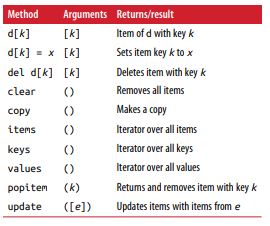

In [76]:
display.Image('res/dict_functions.png')

## Sets

An unordered collection object for other unique objects (no duplicates allowed).

In [77]:
# Can be defined using the set() function
s = set(['u', 'd', 'ud', 'du', 'd', 'du'])
s

{'d', 'du', 'u', 'ud'}

In [78]:
# Can also be defined using curly braces
t = {'d', 'dd', 'uu', 'u'}
t

{'d', 'dd', 'u', 'uu'}

In [79]:
# union(set_object) => performs the union operation on two sets and removes the duplicates
s.union(t)

{'d', 'dd', 'du', 'u', 'ud', 'uu'}

In [80]:
# intersection(set_object) => gets the common values between two sets
s.intersection(t)

{'d', 'u'}

In [81]:
# difference(set_object) => items in s, not in t
s.difference(t)

{'du', 'ud'}

In [82]:
# symmetric_difference(set_object) => items in s or t but not in both
s.symmetric_difference(t)

{'dd', 'du', 'ud', 'uu'}

You can use set objects to get rid of duplicates in list objects.

In [83]:
from random import randint
l = [randint(1, 10) for i in range(1000)]
len(l)

1000

In [84]:
l[:20]

[6, 10, 10, 4, 9, 3, 4, 9, 5, 8, 7, 9, 10, 1, 2, 5, 1, 4, 1, 1]

In [85]:
s = set(l)
s

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}